In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import joblib

In [2]:
data = pd.read_csv('International_Education_Costs.csv')
data.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [4]:
data.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [5]:
print(data['Country'].nunique())
print(data['City'].nunique())
print(data['University'].nunique())
print(data['Program'].nunique())
print(data['Level'].nunique())

71
556
622
92
3


In [6]:
print(data['Level'].unique())

['Master' 'Bachelor' 'PhD']


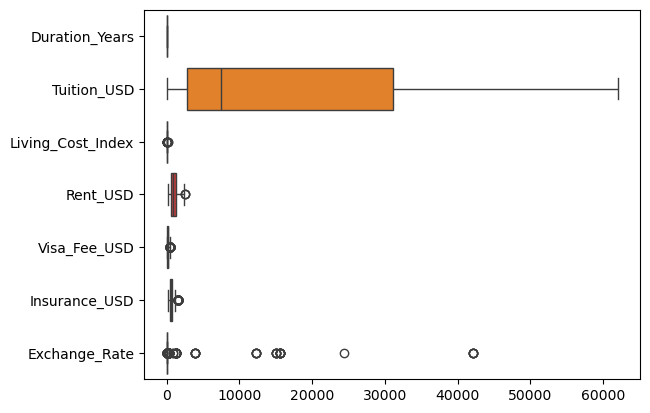

In [7]:
sns.boxplot(data=data,orient='h')
plt.show()

In [8]:
def wisker(col):
    q1,q3=np.percentile(col,[10,80])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [9]:
data.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [10]:
for i in [['Rent_USD', 'Visa_Fee_USD','Insurance_USD', 'Exchange_Rate']]:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

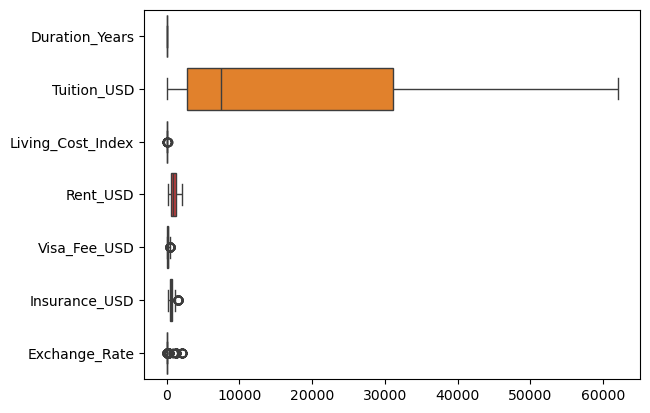

In [11]:
sns.boxplot(data=data,orient='h')
plt.show();

In [12]:
le = LabelEncoder()
cat = data.select_dtypes(include='object').columns
for i in cat:
    data[i] = le.fit_transform(data[i])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    int32  
 1   City               907 non-null    int32  
 2   University         907 non-null    int32  
 3   Program            907 non-null    int32  
 4   Level              907 non-null    int32  
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    float64
 9   Visa_Fee_USD       907 non-null    float64
 10  Insurance_USD      907 non-null    float64
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 67.4 KB


In [14]:
data.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,66,84,101,17,1,2.0,55400,83.5,2123.5,160.0,1500.0,1.00
1,65,283,128,27,1,1.0,41200,75.8,1800.0,485.0,800.0,0.79
2,9,503,572,9,1,2.0,38500,72.5,1600.0,235.0,900.0,1.35
3,2,313,495,44,1,2.0,42000,71.2,1400.0,450.0,650.0,1.52
4,22,330,307,66,1,2.0,500,70.5,1100.0,75.0,550.0,0.92


In [15]:
data[['Living_Cost_Index','Exchange_Rate','Duration_Years']] = data[['Living_Cost_Index','Exchange_Rate','Duration_Years']].astype('int64')

In [16]:
data.head(2)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,66,84,101,17,1,2,55400,83,2123.5,160.0,1500.0,1
1,65,283,128,27,1,1,41200,75,1800.0,485.0,800.0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    int32  
 1   City               907 non-null    int32  
 2   University         907 non-null    int32  
 3   Program            907 non-null    int32  
 4   Level              907 non-null    int32  
 5   Duration_Years     907 non-null    int64  
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    int64  
 8   Rent_USD           907 non-null    float64
 9   Visa_Fee_USD       907 non-null    float64
 10  Insurance_USD      907 non-null    float64
 11  Exchange_Rate      907 non-null    int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 67.4 KB


In [18]:
X = data.drop(['Living_Cost_Index'],axis=1)
y = data['Living_Cost_Index']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
preprocessor = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [23]:
models = {'DT':(DecisionTreeRegressor(),
                {
                 'model__max_depth':[3,5,None]   
                }),
         'RF':(RandomForestRegressor(),
                {
                 'model__max_depth':[5,None],
                 'model__n_estimators':[100,200]
                }),
          'XGB':(XGBRegressor(),
                {
                 'model__max_depth':[3,5],
                 'model__n_estimators':[100,200]
                })
         }

In [24]:
best_model = None
best_score = 0

for name,(model,params) in models.items():
    pipe = Pipeline([
        ('prep',preprocessor),
        ('model',model)
    ])
    
    grid = GridSearchCV(pipe,param_grid=params,cv=5,scoring='r2')
    grid.fit(X_train,y_train)
    if grid.best_score_>best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_

In [25]:
best_score

0.9676539421081543

In [26]:
best_model

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [27]:
feature_columns = X.columns.to_list()

In [28]:
joblib.dump(best_model,'International_Education_Costs.joblib')

['International_Education_Costs.joblib']

In [29]:
joblib.dump(feature_columns,'features_International_Education_Costs.joblib')

['features_International_Education_Costs.joblib']